In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_mean_and_std(accuracies):
    """
    Returns a 1D tensor containing the average accuracies for every task seen so far, in order, averaged over all runs.
    """
    num_tasks = accuracies.shape[1]
    assert accuracies.shape[2] == num_tasks

    accs = accuracies.sum(dim=1) / torch.arange(1, num_tasks + 1)     # average over tasks seen so far
    means = accs.mean(dim=0)
    stds = accs.std(dim=0)

    return list(means), list(stds)

torch.Size([10, 5, 5])
torch.Size([10, 5, 5])
torch.Size([10, 5, 5])
torch.Size([10, 5, 5])
torch.Size([10, 5, 5])


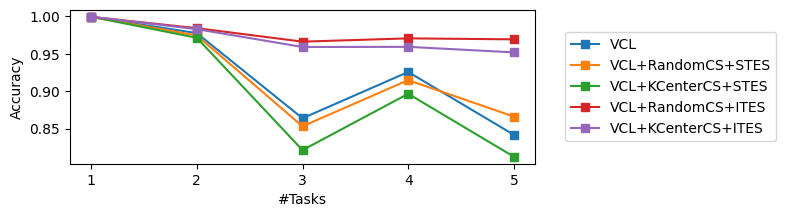

In [3]:
# Load the accuracies on the sMNIST dataset
# Format: accuracies[run_id][eval_task_id][loop_task_id]

no_cs = torch.load("reproducing-base-results/smnist-no-coreset/accuracies.pt")
random_cs = torch.load("reproducing-base-results/smnist-random-coreset/accuracies.pt")
kcenter_cs = torch.load("reproducing-base-results/smnist-kcenter-coreset/accuracies.pt")
random_cs_interleaved = torch.load("reproducing-base-results/smnist-random-coreset-interleaved/accuracies.pt")
kcenter_cs_interleaved = torch.load("reproducing-base-results/smnist-kcenter-coreset-interleaved/accuracies.pt")

print(no_cs.shape)
print(random_cs.shape)
print(kcenter_cs.shape)
print(random_cs_interleaved.shape)
print(kcenter_cs_interleaved.shape)

no_cs_means, no_cs_stds = get_mean_and_std(no_cs)
random_cs_means, random_cs_stds = get_mean_and_std(random_cs)
kcenter_cs_means, kcenter_cs_stds = get_mean_and_std(kcenter_cs)
random_cs_interleaved_means, random_cs_interleaved_stds = get_mean_and_std(random_cs_interleaved)
kcenter_cs_interleaved_means, kcenter_cs_interleaved_stds = get_mean_and_std(kcenter_cs_interleaved)


tasks = list(range(1,no_cs.shape[1]+1))

fig = plt.figure(figsize=(6,2))

# don't plot error bars in order to make the plot more readable
plt.plot(tasks, no_cs_means, label="VCL", marker='s')
plt.plot(tasks, random_cs_means, label="VCL+RandomCS+STES", marker='s')
plt.plot(tasks, kcenter_cs_means, label="VCL+KCenterCS+STES", marker='s')
plt.plot(tasks, random_cs_interleaved_means, label="VCL+RandomCS+ITES", marker='s')
plt.plot(tasks, kcenter_cs_interleaved_means, label="VCL+KCenterCS+ITES", marker='s')

plt.xticks(tasks)

# plt.title('Average test accuracy on Split MNIST')
plt.xlabel('#Tasks')
plt.ylabel('Accuracy')

# Place the legend outside of the main plot, vertically centered and just to the right of the main plot
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')


plt.show()

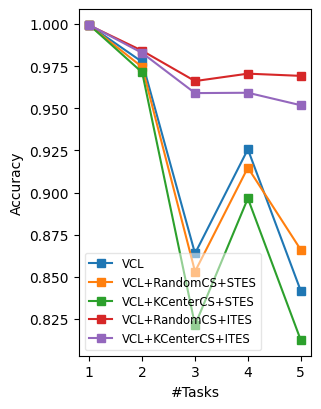

In [33]:
fig = plt.figure(figsize=(3,4.5))

# don't plot error bars in order to make the plot more readable
plt.plot(tasks, no_cs_means, label="VCL", marker='s')
plt.plot(tasks, random_cs_means, label="VCL+RandomCS+STES", marker='s')
plt.plot(tasks, kcenter_cs_means, label="VCL+KCenterCS+STES", marker='s')
plt.plot(tasks, random_cs_interleaved_means, label="VCL+RandomCS+ITES", marker='s')
plt.plot(tasks, kcenter_cs_interleaved_means, label="VCL+KCenterCS+ITES", marker='s')

plt.xticks(tasks)

# plt.title('Average test accuracy on Split MNIST')
plt.xlabel('#Tasks')
plt.ylabel('Accuracy')

# Place the legend outside of the main plot, vertically centered and just to the right of the main plot

plt.legend(fontsize='small', framealpha=0.5)


plt.show()

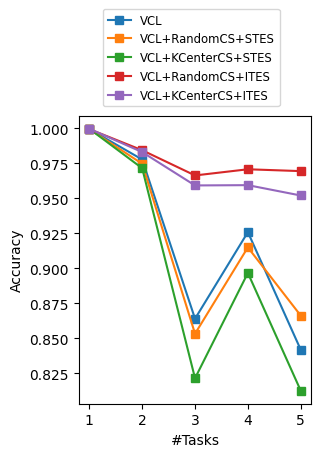

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(3,4.5))

# don't plot error bars in order to make the plot more readable
axs.plot(tasks, no_cs_means, label="VCL", marker='s')
axs.plot(tasks, random_cs_means, label="VCL+RandomCS+STES", marker='s')
axs.plot(tasks, kcenter_cs_means, label="VCL+KCenterCS+STES", marker='s')
axs.plot(tasks, random_cs_interleaved_means, label="VCL+RandomCS+ITES", marker='s')
axs.plot(tasks, kcenter_cs_interleaved_means, label="VCL+KCenterCS+ITES", marker='s')

axs.set_xticks(tasks)

# plt.title('Average test accuracy on Split MNIST')
axs.set_xlabel('#Tasks')
axs.set_ylabel('Accuracy')

# Place the legend outside of the main plot, vertically centered and just to the right of the main plot
fig.subplots_adjust(top=0.75)

handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=1, fontsize='small', bbox_to_anchor=(0.5, 1))


plt.show()

In [4]:
def get_lr_schedule(decay_factor=1, base_value=1e-3, num_tasks=5):
    """
    Returns a list of learning rates for each task, starting at base_value and decaying by decay_factor after each task.
    """
    return [base_value * decay_factor ** i for i in range(num_tasks)]

<>:10: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\g'
C:\Users\jonas\AppData\Local\Temp\ipykernel_36744\2415438328.py:10: SyntaxWarning: invalid escape sequence '\g'
  label=f"$\gamma={decay_factor}$",


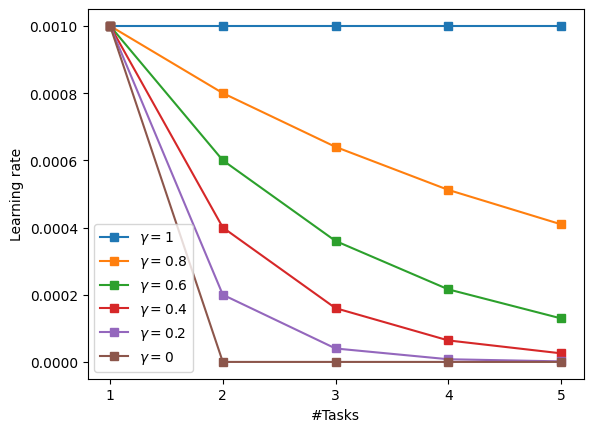

In [5]:
# PLOT LR SCHEDULES

tasks = list(range(1,6))

decay_factors = [1, 0.5, 0.1, 0]
decay_factors = [np.power(i, 1) for i in [1,0.8,0.6,0.4,0.2,0]]    # [1,0.75,0.5,0.25,0]
for decay_factor in decay_factors:
    plt.plot(
        tasks, get_lr_schedule(decay_factor=decay_factor, num_tasks=len(tasks)),
        label=f"$\gamma={decay_factor}$",
        marker="s"
    )


plt.xticks(tasks)

# plt.title('Learning rate schedules for Split Fashion MNIST')
plt.xlabel('#Tasks')
plt.ylabel('Learning rate')
plt.legend()

plt.show()

In [6]:
decay0 = torch.load("lr-schedule/decay-0/accuracies.pt")
decay02 = torch.load("lr-schedule/decay-0.2/accuracies.pt")
decay04 = torch.load("lr-schedule/decay-0.4/accuracies.pt")
decay06 = torch.load("lr-schedule/decay-0.6/accuracies.pt")
decay08 = torch.load("lr-schedule/decay-0.8/accuracies.pt")
decay1 = torch.load("lr-schedule/decay-1.0/accuracies.pt")

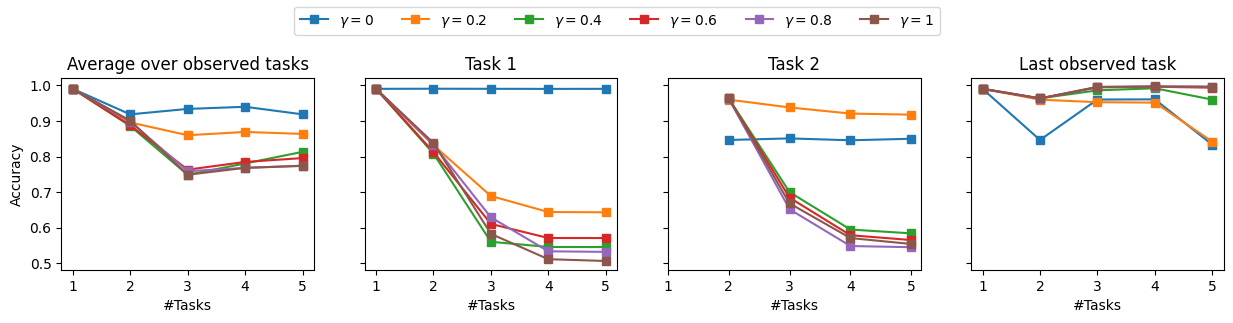

In [7]:
decay0_avg, _ = get_mean_and_std(decay0)
decay02_avg, _ = get_mean_and_std(decay02)
decay04_avg, _ = get_mean_and_std(decay04)
decay06_avg, _ = get_mean_and_std(decay06)
decay08_avg, _ = get_mean_and_std(decay08)
decay1_avg, _ = get_mean_and_std(decay1)

# Make a plot with three subplots:
# 1. Average accuracies for each task
# 2. Average accuracies on task 1, after seeing tasks 1,2,3,4,5
# 3. Average accuracies on task 2, after seeing tasks 2,3,4,5
tasks = list(range(1,decay0.shape[1]+1))

fig, axs = plt.subplots(1, 4, figsize=(15, 3), sharey=True)

# Plot average accuracies for each task
axs[0].plot(tasks, decay0_avg, label="$\\gamma=0$", marker="s")
axs[0].plot(tasks, decay02_avg, label="$\\gamma=0.2$", marker="s")
axs[0].plot(tasks, decay04_avg, label="$\\gamma=0.4$", marker="s")
axs[0].plot(tasks, decay06_avg, label="$\\gamma=0.6$", marker="s")
axs[0].plot(tasks, decay08_avg, label="$\\gamma=0.8$", marker="s")
axs[0].plot(tasks, decay1_avg, label="$\\gamma=1$", marker="s")

axs[0].set_xticks(tasks)
axs[0].set_xlabel('#Tasks')
axs[0].set_ylabel('Accuracy')

axs[0].set_title('Average over observed tasks')

# Plot average accuracies on task 1
axs[1].plot(tasks, decay0[:, 0, 0:].mean(dim=0), label="$\\gamma=0$", marker="s")
axs[1].plot(tasks, decay02[:, 0, 0:].mean(dim=0), label="$\\gamma=0.2$", marker="s")
axs[1].plot(tasks, decay04[:, 0, 0:].mean(dim=0), label="$\\gamma=0.4$", marker="s")
axs[1].plot(tasks, decay06[:, 0, 0:].mean(dim=0), label="$\\gamma=0.6$", marker="s")
axs[1].plot(tasks, decay08[:, 0, 0:].mean(dim=0), label="$\\gamma=0.8$", marker="s")
axs[1].plot(tasks, decay1[:, 0, 0:].mean(dim=0), label="$\\gamma=1$", marker="s")

axs[1].set_xticks(tasks)
axs[1].set_xlabel('#Tasks')

axs[1].set_title('Task 1')

# Plot average accuracies on task 2
axs[2].plot(tasks[1:], decay0[:, 1, 1:].mean(dim=0), label="$\\gamma=0$", marker="s")
axs[2].plot(tasks[1:], decay02[:, 1, 1:].mean(dim=0), label="$\\gamma=0.2$", marker="s")
axs[2].plot(tasks[1:], decay04[:, 1, 1:].mean(dim=0), label="$\\gamma=0.4$", marker="s")
axs[2].plot(tasks[1:], decay06[:, 1, 1:].mean(dim=0), label="$\\gamma=0.6$", marker="s")
axs[2].plot(tasks[1:], decay08[:, 1, 1:].mean(dim=0), label="$\\gamma=0.8$", marker="s")
axs[2].plot(tasks[1:], decay1[:, 1, 1:].mean(dim=0), label="$\\gamma=1$", marker="s")

axs[2].set_xticks(tasks)
axs[2].set_xlabel('#Tasks')

axs[2].set_title('Task 2')

# Plot average accuracies on the last seen task

axs[3].plot(tasks, torch.diagonal(decay0, dim1=1, dim2=2).mean(dim=0), label="$\\gamma=0$", marker="s")
axs[3].plot(tasks, torch.diagonal(decay02, dim1=1, dim2=2).mean(dim=0), label="$\\gamma=0.2$", marker="s")
axs[3].plot(tasks, torch.diagonal(decay04, dim1=1, dim2=2).mean(dim=0), label="$\\gamma=0.4$", marker="s")
axs[3].plot(tasks, torch.diagonal(decay06, dim1=1, dim2=2).mean(dim=0), label="$\\gamma=0.6$", marker="s")
axs[3].plot(tasks, torch.diagonal(decay08, dim1=1, dim2=2).mean(dim=0), label="$\\gamma=0.8$", marker="s")
axs[3].plot(tasks, torch.diagonal(decay1, dim1=1, dim2=2).mean(dim=0), label="$\\gamma=1$", marker="s")

axs[3].set_xticks(tasks)
axs[3].set_xlabel('#Tasks')

axs[3].set_title('Last observed task')

# Adjust the height of the subplots so it fits the legend
fig.subplots_adjust(top=0.75)

handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, fontsize='medium')

In [8]:
tasks = list(range(1,decay0.shape[1]+1))

# plt.plot(tasks, get_avg_accuracies(decay0), label="$\\gamma=0$")
# plt.plot(tasks, get_avg_accuracies(decay02), label="$\\gamma=0.2$")
# plt.plot(tasks, get_avg_accuracies(decay04), label="$\\gamma=0.4$")
# plt.plot(tasks, get_avg_accuracies(decay06), label="$\\gamma=0.6$")
# plt.plot(tasks, get_avg_accuracies(decay08), label="$\\gamma=0.8$")
plt.plot(tasks, get_avg_accuracies(decay1), label="$\\gamma=1$")


plt.xticks(tasks)

# plt.title('Average test accuracy on Split Fashion MNIST')
plt.xlabel('#Tasks')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

NameError: name 'get_avg_accuracies' is not defined

In [ ]:
a = torch.randn((4,2))
b = torch.nn.functional.one_hot(torch.tensor([0,0,0,0]), num_classes=2).to(torch.float32)
print(a)
print(b)

tensor([[-0.6694, -0.5163],
        [ 0.5740, -0.1269],
        [-1.1437,  2.0836],
        [ 0.1533,  1.2560]])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])


In [ ]:
loss_fn = torch.nn.CrossEntropyLoss(reduction='none')
loss_fn(a,b)

tensor([0.7726, 0.4029, 3.2662, 1.3894])

In [ ]:
loss_fn2 = torch.nn.CrossEntropyLoss(reduction='sum')
loss_fn2(a,b)

tensor(5.8310)

In [ ]:
print(torch.exp(a))
print(torch.exp(a).sum(dim=1))

preds = torch.exp(a) / torch.exp(a).sum(dim=1).unsqueeze(1)
print(preds)
print(torch.log(preds))

tensor([[0.5120, 0.5967],
        [1.7754, 0.8808],
        [0.3186, 8.0331],
        [1.1657, 3.5114]])
tensor([1.1087, 2.6562, 8.3517, 4.6771])
tensor([[0.4618, 0.5382],
        [0.6684, 0.3316],
        [0.0382, 0.9618],
        [0.2492, 0.7508]])
tensor([[-0.7726, -0.6196],
        [-0.4029, -1.1038],
        [-3.2662, -0.0389],
        [-1.3894, -0.2867]])


In [ ]:
print(a)
a**2

tensor([[-0.6694, -0.5163],
        [ 0.5740, -0.1269],
        [-1.1437,  2.0836],
        [ 0.1533,  1.2560]])


tensor([[0.4480, 0.2666],
        [0.3295, 0.0161],
        [1.3081, 4.3412],
        [0.0235, 1.5776]])

In [ ]:
from models import BayesianNN

bay_nn = BayesianNN(2, 784, 256, 2)
prior_nn = BayesianNN(2, 784, 256, 2)

prior_nn.load_state_dict(bay_nn.state_dict())
(prior_nn.first_layer.weight_mu - bay_nn.first_layer.weight_mu).mean()

tensor(0., grad_fn=<MeanBackward0>)

In [ ]:
bay_nn.first_layer.weight_mu.requires_grad

True

In [ ]:
for param in bay_nn.parameters():
    param.requires_grad = False

In [ ]:
list(bay_nn.first_layer.named_parameters())
bay_nn.first_layer.weight_mu.requires_grad

False

In [ ]:
0 + torch.tensor(4, dtype=torch.float32, requires_grad=True)

tensor(4., grad_fn=<AddBackward0>)

In [ ]:
no_cs

tensor([[[0.9991, 0.9972, 0.6870, 0.8652, 0.6317],
         [0.0000, 0.9657, 0.7630, 0.9256, 0.9070],
         [0.0000, 0.0000, 0.9856, 0.8639, 0.8847],
         [0.0000, 0.0000, 0.0000, 0.9955, 0.9789],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.9723]],

        [[0.9991, 0.9901, 0.8047, 0.9173, 0.5400],
         [0.0000, 0.9736, 0.7174, 0.9172, 0.6484],
         [0.0000, 0.0000, 0.9755, 0.8196, 0.2316],
         [0.0000, 0.0000, 0.0000, 0.9930, 0.9527],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.9702]],

        [[0.9991, 0.9825, 0.9333, 0.9456, 0.9626],
         [0.0000, 0.9765, 0.7218, 0.9324, 0.8790],
         [0.0000, 0.0000, 0.9744, 0.9317, 0.9771],
         [0.0000, 0.0000, 0.0000, 0.9940, 0.9859],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.9682]],

        [[0.9995, 0.9995, 0.9962, 0.9749, 0.6241],
         [0.0000, 0.9564, 0.7649, 0.8692, 0.7233],
         [0.0000, 0.0000, 0.9877, 0.9696, 0.9594],
         [0.0000, 0.0000, 0.0000, 0.9909, 0.9814],
         [0.0000, 0.0000,

In [ ]:
no_cs.mean(dim=1)

tensor([[0.1998, 0.3926, 0.4871, 0.7300, 0.8749],
        [0.1998, 0.3927, 0.4995, 0.7294, 0.6686],
        [0.1998, 0.3918, 0.5259, 0.7607, 0.9546],
        [0.1999, 0.3912, 0.5498, 0.7609, 0.8513],
        [0.1998, 0.3925, 0.5118, 0.7382, 0.7368],
        [0.2000, 0.3915, 0.5644, 0.7584, 0.9239],
        [0.1998, 0.3799, 0.4665, 0.6937, 0.7334],
        [0.1999, 0.3950, 0.5231, 0.7608, 0.9064],
        [0.1998, 0.3895, 0.4952, 0.7081, 0.9032],
        [0.1999, 0.3935, 0.5600, 0.7654, 0.8652]])